In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="peAtdpeJN9JbTS3jM8EV")
project = rf.workspace("pidray-8gl3p").project("pidray-bbmo7")
dataset = project.version(1).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.0, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PIDRAY-1 in yolov8:: 100%|██████████| 20132/20132 [00:02<00:00, 8269.47it/s] 


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 169MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/PIDRAY-1 datasets/sixray100-1

# **TRAIN MODEL**

In [7]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=150, imgsz=640, batch=16,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
2024-01-11 14:22:20,324	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-11 14:22:20,815	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-1/train/labels... 7820 images, 2 backgrounds, 0 corrupt: 100%|██████████| 7820/7820 [00:06<00:00, 1262.22it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-1/valid/labels... 1537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:01<00:00, 1224.07it/s]

val: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-1/valid/labels.cache


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.08G      1.384       3.13      1.541         36        640: 100%|██████████| 489/489 [02:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:14<00:00,  3.49it/s]

                   all       1537       1694      0.672      0.244        0.3      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.12G      1.179      1.647      1.322         23        640: 100%|██████████| 489/489 [01:57<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.47it/s]

                   all       1537       1694      0.575      0.365      0.382      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.11G      1.263       1.64      1.361         44        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.47it/s]

                   all       1537       1694      0.417      0.364      0.335      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.11G      1.352      1.715      1.425         35        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.48it/s]

                   all       1537       1694      0.498      0.336      0.355      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.14G      1.301      1.568      1.386         23        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.45it/s]

                   all       1537       1694      0.569      0.428       0.43      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.12G       1.24      1.448      1.353         37        640: 100%|██████████| 489/489 [01:55<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.46it/s]

                   all       1537       1694       0.62      0.408      0.439      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       4.1G      1.196      1.367      1.321         34        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.46it/s]

                   all       1537       1694      0.683      0.498      0.485       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       4.1G      1.164      1.301      1.298         29        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.49it/s]

                   all       1537       1694      0.715      0.452      0.524      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.12G      1.119      1.229      1.272         42        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.52it/s]

                   all       1537       1694      0.601      0.493      0.504      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.12G      1.112      1.196      1.269         35        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.50it/s]


                   all       1537       1694      0.739      0.521      0.536      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.13G      1.073      1.148      1.247         26        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.46it/s]

                   all       1537       1694      0.695      0.503      0.505      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.12G      1.057      1.109      1.234         49        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.51it/s]

                   all       1537       1694      0.782      0.492      0.546      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.11G      1.044      1.077      1.221         33        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.53it/s]

                   all       1537       1694      0.712      0.527      0.515        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.13G      1.024      1.059      1.209         27        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.52it/s]

                   all       1537       1694      0.719      0.555       0.63        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.12G      1.004      1.027        1.2         36        640: 100%|██████████| 489/489 [01:55<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.52it/s]

                   all       1537       1694      0.684      0.561      0.565      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       4.1G      1.008       1.01      1.204         50        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.51it/s]

                   all       1537       1694      0.775      0.576      0.598      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.11G     0.9807     0.9813      1.183         22        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.54it/s]

                   all       1537       1694      0.733      0.571      0.591      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.11G     0.9729     0.9586      1.176         45        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]


                   all       1537       1694      0.732      0.505      0.585      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.11G     0.9575     0.9463      1.171         27        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]

                   all       1537       1694      0.826      0.561      0.641      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.11G     0.9501     0.9282      1.166         39        640: 100%|██████████| 489/489 [01:55<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.805      0.558      0.615      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.14G     0.9375     0.9131      1.156         32        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.644      0.586        0.6      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.11G      0.934     0.9089      1.154         22        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.851      0.565      0.668       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.12G     0.9153      0.874       1.14         26        640: 100%|██████████| 489/489 [01:55<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.50it/s]

                   all       1537       1694      0.823      0.562       0.65      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       4.1G      0.916     0.8714      1.141         47        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.42it/s]

                   all       1537       1694      0.828      0.594      0.661      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.11G     0.8968     0.8551      1.132         24        640: 100%|██████████| 489/489 [01:56<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.48it/s]

                   all       1537       1694      0.827      0.617       0.66      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.14G     0.9118     0.8533      1.136         34        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.44it/s]

                   all       1537       1694      0.848      0.597      0.659      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.27G     0.8835     0.8318      1.124         37        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.46it/s]

                   all       1537       1694      0.792      0.616      0.674      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.11G      0.881     0.8222      1.119         33        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.47it/s]

                   all       1537       1694      0.873      0.603      0.703      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.11G     0.8725     0.8112      1.116         30        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.44it/s]

                   all       1537       1694      0.915      0.582      0.703      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.11G     0.8719     0.7974      1.113         37        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.51it/s]

                   all       1537       1694      0.846      0.622      0.689      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.26G     0.8627        0.8      1.113         25        640: 100%|██████████| 489/489 [01:56<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]

                   all       1537       1694      0.849      0.654       0.72      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.11G     0.8614     0.7765      1.107         29        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.58it/s]

                   all       1537       1694      0.897      0.639      0.712      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.12G     0.8496     0.7761      1.099         25        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.53it/s]

                   all       1537       1694      0.883      0.655       0.73      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.11G     0.8383     0.7678      1.097         48        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.56it/s]

                   all       1537       1694      0.838      0.648      0.763      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.28G     0.8483      0.769      1.095         20        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.54it/s]

                   all       1537       1694        0.8       0.65      0.677      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.12G     0.8358     0.7503      1.088         25        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.842      0.657      0.703      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.14G     0.8387     0.7482      1.092         30        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.52it/s]

                   all       1537       1694      0.865      0.611      0.652      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.12G     0.8195     0.7299      1.081         37        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694      0.826      0.636      0.665      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.28G     0.8226     0.7285      1.085         31        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.56it/s]

                   all       1537       1694      0.736      0.705      0.706       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.13G      0.817     0.7269      1.082         40        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.54it/s]

                   all       1537       1694      0.854      0.661      0.714        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.14G     0.8167     0.7312      1.081         25        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.53it/s]

                   all       1537       1694      0.861      0.636      0.714      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.11G     0.8075     0.7185      1.072         24        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.841      0.687      0.735      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.12G     0.8055     0.7102      1.077         32        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.855      0.668       0.74      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.12G     0.8013      0.699      1.069         32        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.848      0.646      0.738      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.11G     0.7902     0.6891      1.061         46        640: 100%|██████████| 489/489 [01:55<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.61it/s]

                   all       1537       1694      0.804      0.684      0.728      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.13G      0.794     0.6883      1.063         33        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.873      0.633      0.747      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.28G     0.7902     0.6865      1.064         37        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694      0.869      0.642      0.779      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.11G     0.7838     0.6769      1.059         29        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.61it/s]

                   all       1537       1694      0.857      0.664      0.769      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.11G      0.779     0.6724      1.058         29        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.50it/s]

                   all       1537       1694      0.872      0.654      0.773      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.11G     0.7814     0.6791      1.059         31        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.743      0.724      0.785      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.11G     0.7631     0.6573      1.047         39        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.746      0.684      0.752      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.13G     0.7687      0.654      1.052         28        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694        0.9      0.647      0.802      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.11G     0.7671     0.6569      1.049         21        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]

                   all       1537       1694      0.884       0.65      0.761       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.14G      0.767     0.6557       1.05         35        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.58it/s]

                   all       1537       1694      0.885      0.678      0.735       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.11G     0.7583     0.6449      1.045         42        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.64it/s]

                   all       1537       1694      0.885      0.683      0.808      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.11G     0.7578     0.6455      1.045         25        640: 100%|██████████| 489/489 [01:55<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694      0.665      0.742      0.764       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.11G     0.7488     0.6363      1.039         32        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.64it/s]

                   all       1537       1694      0.939      0.641      0.764      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.11G     0.7455     0.6295      1.036         27        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.868      0.683      0.764      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.26G     0.7503     0.6302      1.037         26        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.66it/s]

                   all       1537       1694      0.799      0.714      0.762       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.11G     0.7498     0.6355      1.041         35        640: 100%|██████████| 489/489 [01:55<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.60it/s]

                   all       1537       1694      0.851       0.69      0.778      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.12G     0.7413     0.6182      1.036         39        640:  56%|█████▌    | 272/489 [01:04<00:51,  4.23it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

     63/150       4.1G     0.7278     0.6113      1.028         29        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.54it/s]

                   all       1537       1694      0.837      0.704      0.795      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.11G     0.7408      0.617      1.034         38        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.60it/s]

                   all       1537       1694      0.895      0.657      0.793      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.11G     0.7263     0.6099      1.027         33        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694       0.91      0.687      0.798      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.11G     0.7193     0.5946      1.022         30        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.66it/s]

                   all       1537       1694      0.861      0.723      0.807      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.26G     0.7274     0.6062       1.03         38        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.63it/s]

                   all       1537       1694      0.829      0.719      0.787      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.11G      0.721      0.597      1.023         32        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.61it/s]

                   all       1537       1694       0.87      0.702      0.802      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.13G     0.7138     0.5917      1.022         32        640: 100%|██████████| 489/489 [01:55<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.857      0.694      0.792      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.11G     0.7082     0.5885       1.02         43        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.67it/s]


                   all       1537       1694      0.893      0.647      0.783      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.13G     0.7125     0.5881       1.02         42        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.61it/s]

                   all       1537       1694      0.725      0.758      0.798      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.11G     0.7064     0.5792      1.017         45        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.65it/s]

                   all       1537       1694      0.895      0.702      0.817      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.11G     0.7034     0.5739       1.01         31        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694      0.867      0.715      0.822      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.11G     0.7034     0.5678      1.017         28        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.937      0.671      0.793      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.12G     0.7017     0.5767      1.015         31        640: 100%|██████████| 489/489 [01:56<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.64it/s]

                   all       1537       1694      0.859      0.699      0.805      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.13G     0.6938     0.5718      1.005         48        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.64it/s]

                   all       1537       1694      0.896      0.675      0.784      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.13G     0.6908     0.5654      1.009         40        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.863      0.709      0.784      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.11G      0.695     0.5658      1.011         33        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.61it/s]

                   all       1537       1694        0.9      0.679      0.795      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.12G     0.6865     0.5598      1.004         25        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.892      0.679      0.772      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.13G     0.6787     0.5477      1.002         23        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.61it/s]

                   all       1537       1694      0.909      0.679      0.738      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.13G     0.6788     0.5509      1.002         31        640: 100%|██████████| 489/489 [01:56<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:11<00:00,  4.45it/s]

                   all       1537       1694      0.894      0.678      0.762      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.12G     0.6784     0.5549          1         30        640: 100%|██████████| 489/489 [01:56<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.53it/s]

                   all       1537       1694      0.917       0.67       0.78      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.11G      0.676     0.5389     0.9989         27        640: 100%|██████████| 489/489 [01:56<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.51it/s]

                   all       1537       1694      0.931      0.661      0.785      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.13G     0.6747     0.5405      1.001         31        640: 100%|██████████| 489/489 [01:56<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]

                   all       1537       1694      0.923      0.663      0.769      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.11G     0.6738     0.5419     0.9997         27        640: 100%|██████████| 489/489 [01:56<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.54it/s]

                   all       1537       1694      0.922      0.655      0.757      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.11G     0.6625     0.5301     0.9938         37        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.56it/s]

                   all       1537       1694      0.901      0.649      0.748      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.28G     0.6629     0.5329     0.9919         38        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694      0.923      0.645      0.755      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.11G     0.6597     0.5289     0.9906         37        640: 100%|██████████| 489/489 [01:55<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.906      0.668      0.769      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.14G     0.6581     0.5224      0.992         28        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.65it/s]

                   all       1537       1694      0.889       0.67       0.77       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.13G     0.6532     0.5187     0.9897         36        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.60it/s]

                   all       1537       1694      0.891      0.656      0.765      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.26G     0.6547     0.5193     0.9875         27        640: 100%|██████████| 489/489 [01:56<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694      0.911      0.662      0.766      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.11G     0.6495     0.5188     0.9841         35        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.59it/s]

                   all       1537       1694       0.91      0.673      0.755      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.11G     0.6553     0.5183     0.9878         33        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.65it/s]

                   all       1537       1694      0.923       0.67      0.749      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.11G      0.648     0.5132     0.9842         36        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.60it/s]

                   all       1537       1694      0.913      0.673      0.759      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.26G     0.6439     0.5054     0.9873         27        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.915      0.676      0.764       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.11G     0.6439     0.5091     0.9837         28        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.901      0.676      0.769      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.11G     0.6364     0.5065     0.9808         37        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.58it/s]

                   all       1537       1694      0.901      0.677      0.764      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.11G      0.637     0.4986     0.9826         39        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.60it/s]

                   all       1537       1694      0.902       0.68       0.76       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.28G     0.6301     0.4942     0.9751         43        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.60it/s]

                   all       1537       1694       0.89      0.689      0.759      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.13G     0.6323     0.4962     0.9791         28        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.62it/s]

                   all       1537       1694      0.891      0.689      0.772      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.11G     0.6265      0.493      0.978         26        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.60it/s]

                   all       1537       1694      0.897      0.692      0.774      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.13G     0.6259     0.4862     0.9737         33        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]

                   all       1537       1694      0.894      0.693      0.772      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.26G     0.6233     0.4886     0.9735         23        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.46it/s]

                   all       1537       1694      0.879      0.703      0.774      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.11G     0.6206     0.4872     0.9729         24        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.52it/s]

                   all       1537       1694      0.878      0.705      0.778      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.11G     0.6228     0.4817     0.9752         34        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]

                   all       1537       1694      0.876      0.711      0.781      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.11G     0.6162     0.4827     0.9705         26        640: 100%|██████████| 489/489 [01:56<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.54it/s]

                   all       1537       1694      0.891      0.699      0.781      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.11G     0.6115     0.4767     0.9688         31        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.54it/s]

                   all       1537       1694      0.914      0.682      0.789      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.11G      0.602     0.4658     0.9621         35        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.927      0.681       0.79      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.11G     0.6064     0.4715     0.9626         30        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.55it/s]

                   all       1537       1694      0.828      0.729      0.779      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.11G     0.6042     0.4704     0.9664         39        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.58it/s]

                   all       1537       1694      0.861      0.726      0.779      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.12G     0.5998     0.4653     0.9652         37        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.61it/s]

                   all       1537       1694      0.867      0.721      0.777      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.12G     0.5978     0.4661     0.9604         44        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.53it/s]

                   all       1537       1694      0.869      0.721      0.778      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.13G     0.5975     0.4593      0.965         25        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.56it/s]

                   all       1537       1694      0.868      0.721      0.779      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.11G     0.5952      0.457     0.9625         32        640: 100%|██████████| 489/489 [01:55<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.56it/s]

                   all       1537       1694      0.739      0.764      0.778      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.11G     0.5889     0.4552     0.9606         34        640: 100%|██████████| 489/489 [01:55<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:10<00:00,  4.57it/s]

                   all       1537       1694      0.773      0.763       0.79      0.681
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 66, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



116 epochs completed in 4.117 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 22.5MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 22.5MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  3.89it/s]


                   all       1537       1694      0.862      0.722      0.807      0.684
                 Baton       1537          4      0.945       0.25      0.529      0.245
                Bullet       1537          9       0.73      0.111      0.349      0.291
                   Gun       1537         17      0.357      0.706      0.677      0.612
                Hammer       1537        960      0.998      0.927       0.99      0.935
             HandCuffs       1537         13      0.909      0.773      0.902      0.746
                 Knife       1537         13      0.975      0.769        0.8      0.726
               Lighter       1537         16      0.646      0.625      0.632      0.502
                Pliers       1537        375      0.987      0.917      0.984      0.866
             Powerbank       1537         49      0.977      0.886      0.984      0.797
              Scissors       1537        171       0.98      0.878       0.96      0.792
               Spraye

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7932f8792230>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

# **VAIDATE MODEL**

In [8]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-1/valid/labels.cache... 1537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:19<00:00,  5.07it/s]


                   all       1537       1694       0.86      0.725      0.808      0.689
                 Baton       1537          4      0.952       0.25      0.524      0.245
                Bullet       1537          9      0.748      0.111      0.346      0.289
                   Gun       1537         17      0.365      0.706      0.687      0.613
                Hammer       1537        960      0.998      0.929       0.99      0.934
             HandCuffs       1537         13      0.917      0.853      0.923      0.811
                 Knife       1537         13      0.973      0.769      0.799      0.723
               Lighter       1537         16      0.646      0.625      0.632      0.512
                Pliers       1537        375      0.989      0.919      0.983      0.866
             Powerbank       1537         49      0.967      0.878      0.982      0.795
              Scissors       1537        171       0.98      0.878       0.96      0.791
               Spraye

array([     0.2446,     0.28902,     0.61322,     0.93439,      0.8105,     0.72347,     0.51206,     0.86623,     0.79457,     0.79097,     0.77543,     0.91726])

# **TESTING MODEL**


image 1/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23727_png.rf.60d1c5be783f92da65107fcee8eef836.jpg: 608x640 1 Hammer, 88.1ms
image 2/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23887_png.rf.c6d13016a52a1944cd78d76612e8ce1d.jpg: 640x640 (no detections), 17.0ms
image 3/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23888_png.rf.e418610f9ea47c4fae3a5e5fae317f7b.jpg: 480x640 1 Hammer, 86.3ms
image 4/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23890_png.rf.b74b1ca97d05cdd365953dd881cc440e.jpg: 480x640 1 Hammer, 1 HandCuffs, 13.0ms
image 5/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23891_png.rf.6e420733a31c0db4c601f246f52d1b19.jpg: 416x640 1 Hammer, 90.3ms
image 6/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23892_png.rf.0b07c8f337874b55451f39d618f2d2c8.jpg: 512x640 1 HandCuffs, 86.1ms
image 7/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23893_png.rf.cf68d8f69d036634178b9e2f3afd64c0.jpg: 480x640

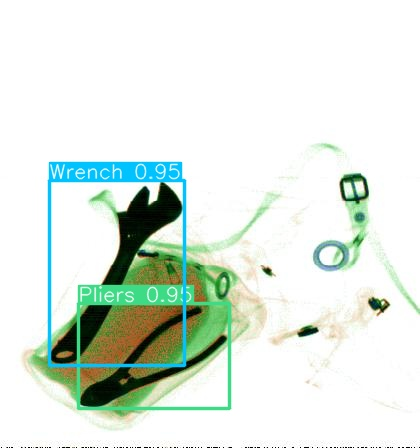

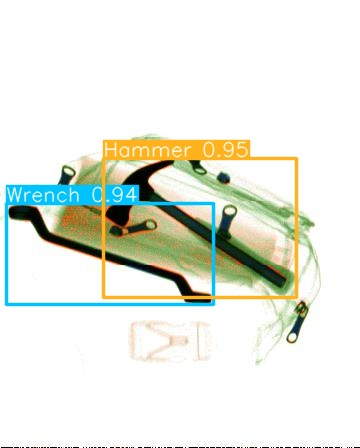

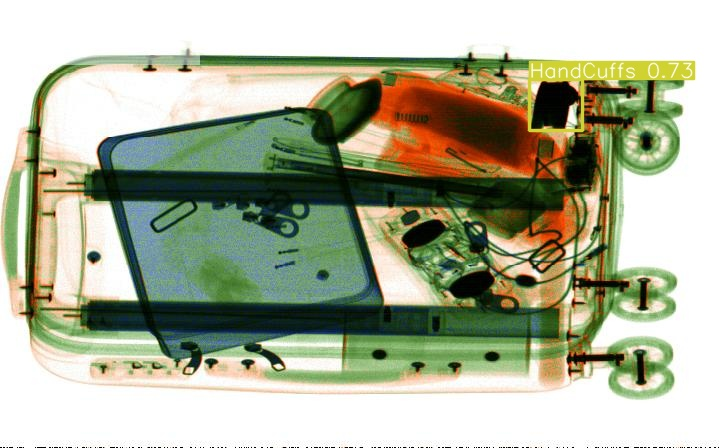

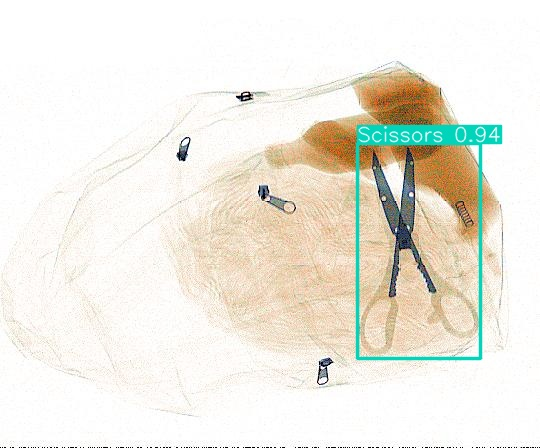

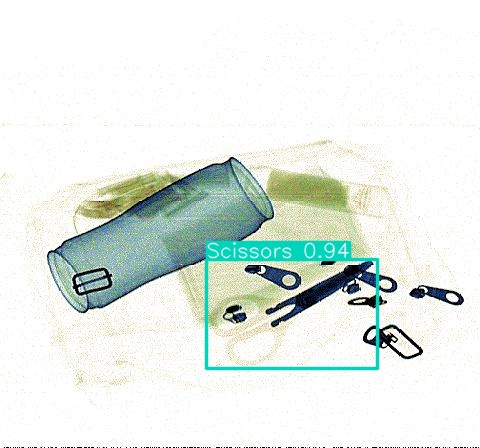

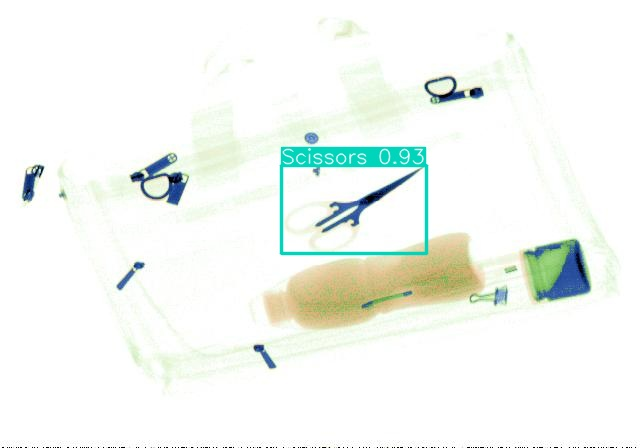

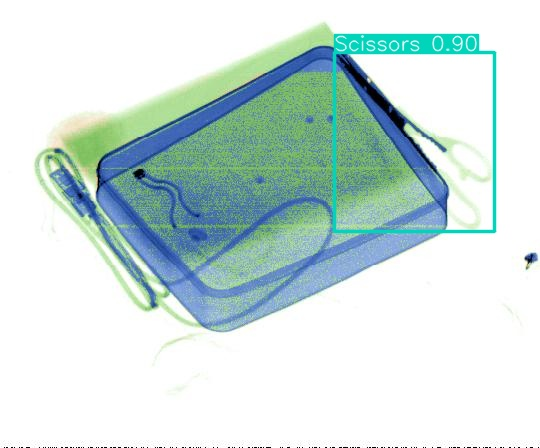

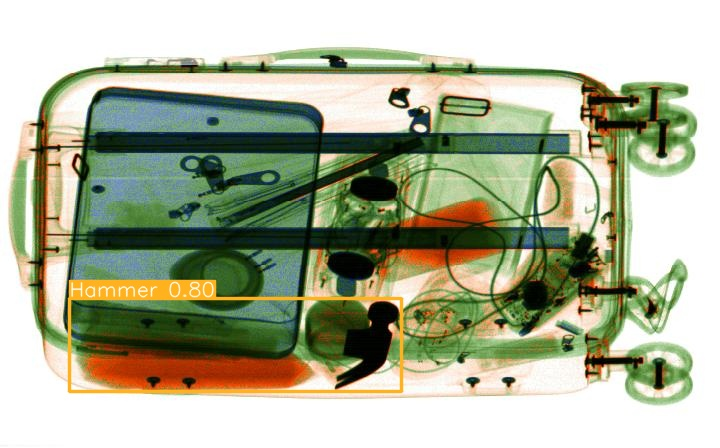

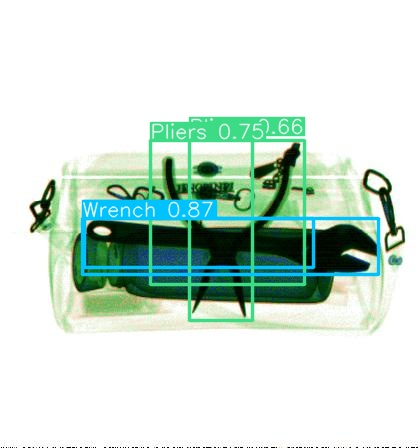

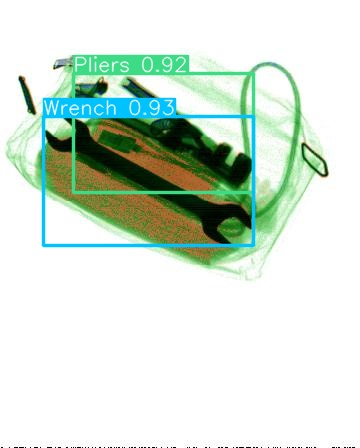

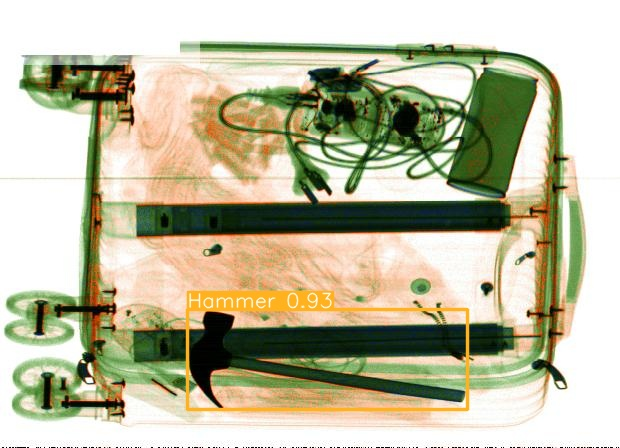

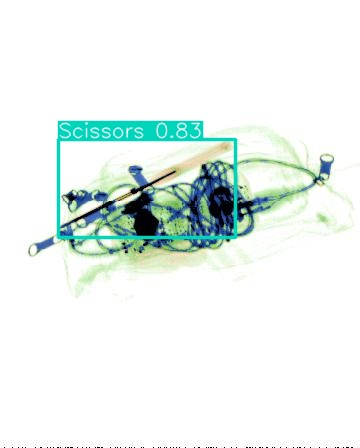

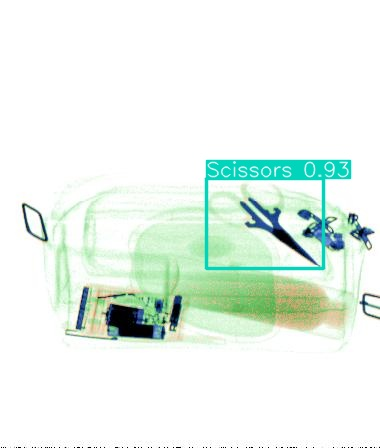

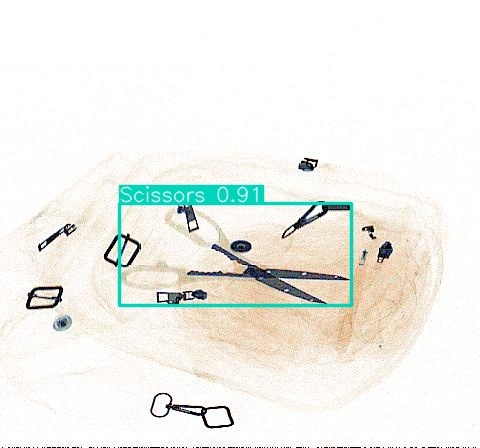

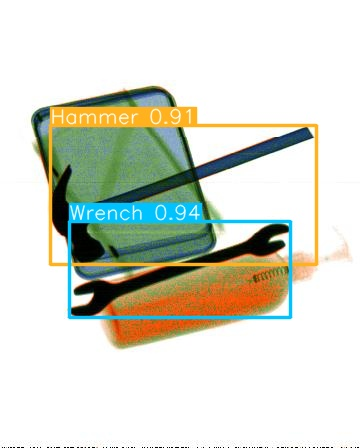

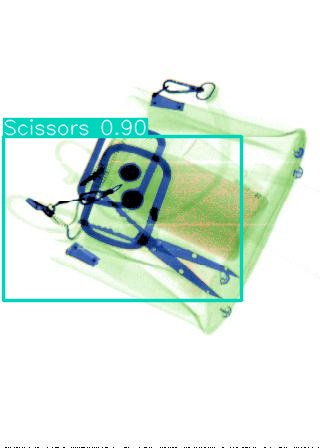

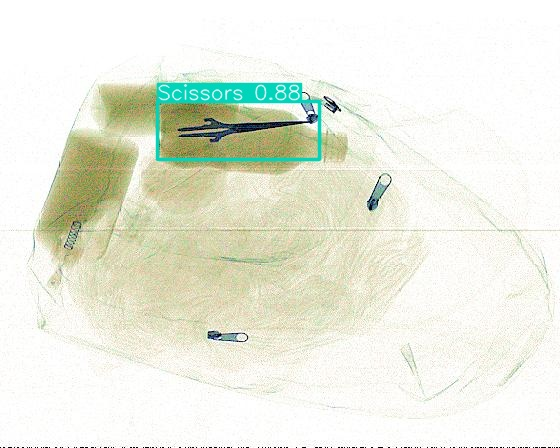

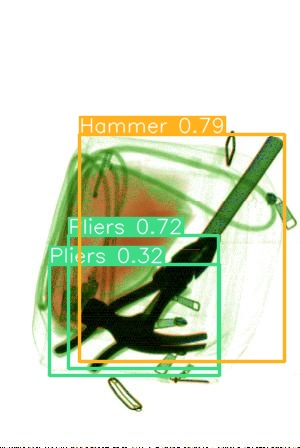

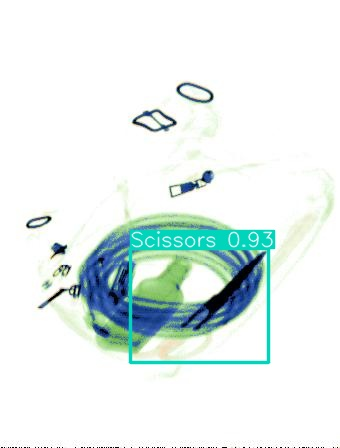

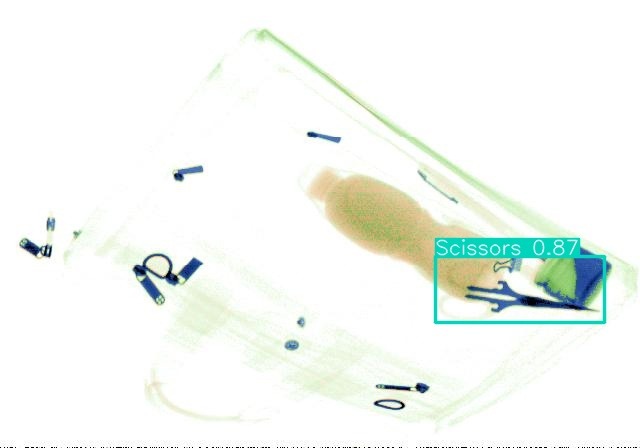

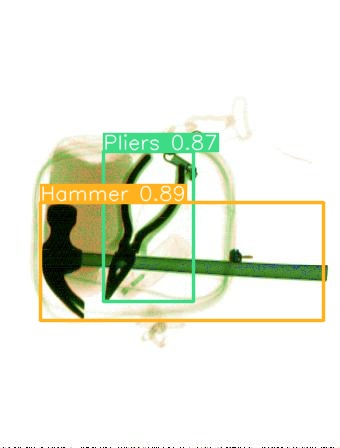

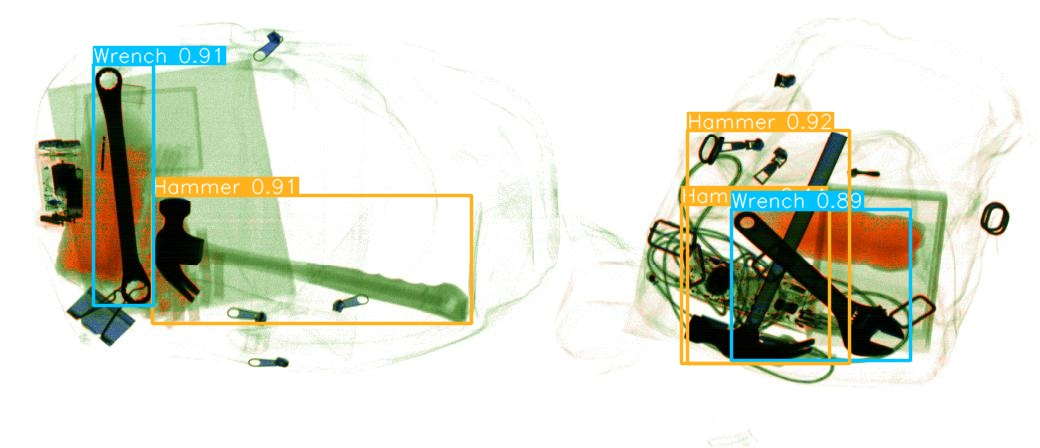

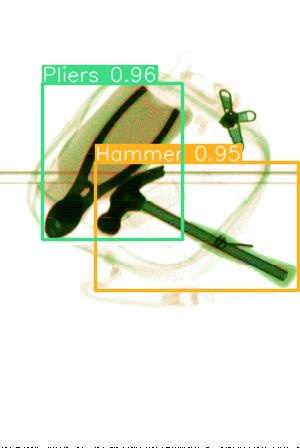

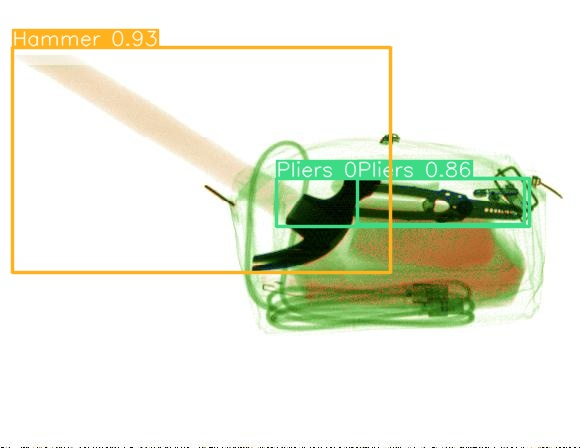

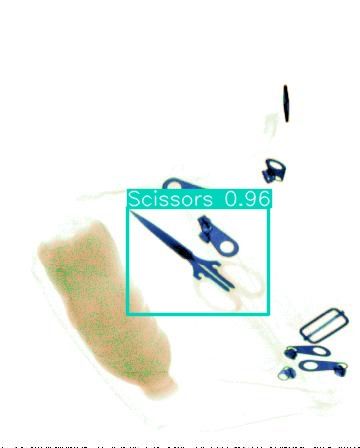

In [9]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/datasets/sixray100-1/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [10]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5362.9/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (1138.14s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅       21.5               0.6865                   11.05
1             TorchScript       ✅       42.9               0.6804                    8.55
2                    ONNX       ✅       42.7               0.6804                   13.18
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎       54.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      106.7               0.6804                   20.71
7     TensorFlow GraphDef       ✅       42.7               0.6804                   18.71
8         TensorFlow 

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,21.5,0.6865,11.05
1,TorchScript,✅,42.9,0.6804,8.55
2,ONNX,✅,42.7,0.6804,13.18
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❎,54.0,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,✅,106.7,0.6804,20.71
7,TensorFlow GraphDef,✅,42.7,0.6804,18.71
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
